<img src = "OKCupid_Logo.svg.png" style = "width: 700px; height: 200px" />

#                     #A Look into Black Dating Profiles

If you type in “dating apps” and “race/ethnicity” you will come across quite a few [articles](https://www.wired.co.uk/article/racial-bias-dating-apps) detailing the racial bias on social media apps. You may come across the [articles & stats](https://www.huffpost.com/entry/okcupid-race_n_5811840) that Black people all around (but even more so Black Women) and Asian men, are the least swiped on/”desirable.” You may also come across articles where minorities express the type of racist/fetishized messages they receive from users outside their race, and you will definitely come across a few articles that blast ethnic filters as racist and a few who don’t. Though these are all interesting things to explore, there are plenty articles already out there. Though these are all interesting to explore I think they unintentionally center whiteness and don’t give a nuanced understanding or enough voice to the wants of many Black people and Black users. What do I mean by this???

Well in okcupid’s now deleted study (you can’t find the dataset and article anywhere but you can find articles talking about/referring back to it), one of the best and most telling data visualizations was this chart:

<img src = "okcupid_racial_bias.png" style = "width: 420px; height: 350px" />

Here you can see the sad truth/disproportionate negativity Black people face. How overall they rate other ethnicities higher than other ethnicities rate them. You can also see some interesting things like that fact that when it comes to ratings, no one racial/ethnic group show all “greens” in their rating, and that Black women more than anyone have a desire to match with Black men.

As a Black woman who has used dating apps (including okcupid), and having Black friends who also use dating apps, some things that I've heard echoed are the prefered desire of Black partnership but the difficulties they face looking for love and on dating app platforms. So I want to focus on Black dating profiles in relation to other Black profiles. What do they tell us? Can they tell us anything?

The dataset isn’t very actionable. It doesn’t give us any data that tells us about users daily activity, the number of matches they get, the people they swipe, the number of messages they send, or whether or not they purchase on the app etc. This dataset simply gives you a survey of the land, which I think to some degree can either bring accuracy and confirmation to some assumptions OR debunk some myths. This analysis doesn’t serve to solely answer questions but to create a space to ask more.


This is my positioning. This is how I would like to explore this data, because though not focused on in dating app articles/stats, it’s definitely a popular conversation amongst African Americans. And I think they (and others) may find this if not useful, as the very least interesting.


## Key Information about this data:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import collections
#import string

In [76]:
df = pd.read_csv("okcupid_profiles.csv")
#just in case we want to get back to the data of the original dataframe
orig_df = df.copy()

### First, Let's take a look at the overall dataframe: 

In [77]:
df.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."


How many people are included in this dataset?? And are there any duplicates??
Let's check!

In [78]:
df.shape

(59946, 31)

In [79]:
df.duplicated().sum()

0

There are no duplicated entries!
And we have a total of **59,946** users in our data set

Now below shows the unique column names we have. From the earlier ".shape" method we used above, "59946" signified the entries, and "31" signified the number of columns/unqique features. 

Below there are some columns that I don't want to use. I don't really care to know when user were last online. That information isn't really useful in this context/without other information that is not included in this dataset. Let that be the one we get rid of first. 

In [80]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

**Getting rid of the "last_online" column:**

In [81]:
#this drops the "last_oline" column (axis1) inplace (on the original dataframe)
df.drop(['last_online'], axis=1, inplace = True)

In [82]:
#now if you run this again, you can see that "last_online" no longer appears. Woohoo!!
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks',
       'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

**Now let get some quick basic info about these entries:**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  location     59946 non-null  object 
 14  offspring    24385 non-null  object 
 15  pets         40025 non-null  object 
 16  religion     39720 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

## Now Let's zoom in on just those users who identified soley as "black" in the ethnicity column:
*****this does not include individuals who may have stated "black" along with other ethncities in the ethnicity column. Nor does it take into account individuals who didn't denote their ethnicity

In [84]:
black_df = df[df["ethnicity"]=="black"]
#we'll just view the first row here
black_df.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
90,24,single,m,straight,average,anything,socially,never,graduated from college/university,black,...,mmmmmm idk what to say so just ask me :),NaN,NaN,my hair.,NaN,"manga, black tie, laptop, someone funny, i'll ...",NaN,NaN,NaN,you don't have anything else to do really.


let's check out some characteristcs of this dataframe

In [85]:
black_df.shape

(2008, 30)

As you can see there are only **2008** users who identify themselves solely as Black in this dataset of 59946 users. You can already see the disproportion, and can assume that for Black users looking for other Black users to date, it may be a bit harder being that there just aren't as many on the apps. And this doesn't even take into account that they're located in various places in California.

In [86]:
black_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 90 to 59913
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2008 non-null   int64  
 1   status       2008 non-null   object 
 2   sex          2008 non-null   object 
 3   orientation  2008 non-null   object 
 4   body_type    1891 non-null   object 
 5   diet         1106 non-null   object 
 6   drinks       1906 non-null   object 
 7   drugs        1711 non-null   object 
 8   education    1762 non-null   object 
 9   ethnicity    2008 non-null   object 
 10  height       2008 non-null   float64
 11  income       2008 non-null   int64  
 12  job          1766 non-null   object 
 13  location     2008 non-null   object 
 14  offspring    971 non-null    object 
 15  pets         1179 non-null   object 
 16  religion     1402 non-null   object 
 17  sign         1802 non-null   object 
 18  smokes       1843 non-null   object 
 19  spea

As you can see after "Age", "Status", "Sex", and "Orientation" (I assume because some of these may be required), people are less and less willing to share other information).

In [87]:
black_df.sex.unique()

array(['m', 'f'], dtype=object)

**Lets break our users up based on denoted sex. As shown above, there are two**

In [88]:
#getting a dataframe that only includes Black Women
black_f = df[(df["ethnicity"] =="black") & (df["sex"] == "f")]

#getting a dataframe that only includes Black Men
black_m = df[(df["ethnicity"] =="black") & (df["sex"] == "m")]

In [89]:
black_f.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
245,45,single,f,straight,full figured,NaN,rarely,never,graduated from college/university,black,...,update: i'm ready for l o v e !! i just need s...,spending far too much time trying to tactfully...,"spelling, listening, learning.",if they met me on the internet first it's usua...,i can give you genres but i'm not a person tha...,"god, family & friends, affection, passion, boo...",everything. i think i have add my mind thinks ...,lately i've been at home *gasp* lazing around ...,i actually watch the mindless entertainment we...,you would like to get to know me better you're...
284,24,single,f,straight,curvy,NaN,socially,never,NaN,black,...,ok well i guess its time to spill my guts out ...,NaN,reading reading people....like a book,are my enormously huge..... ;-) jk i really do...,NaN,1. my baby 2. my sister 3. a job 4. photos 5. ...,what adjustments can be made to make life better,"sleep, work is usually in the am....boooooirri...",ummmm..... :),u love kids u have something more to say than ...


In [90]:
black_m.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
90,24,single,m,straight,average,anything,socially,never,graduated from college/university,black,...,mmmmmm idk what to say so just ask me :),NaN,NaN,my hair.,NaN,"manga, black tie, laptop, someone funny, i'll ...",NaN,NaN,NaN,you don't have anything else to do really.
99,46,single,m,straight,average,mostly anything,socially,never,NaN,black,...,"hello, i am outgoing, family oriented. i am a ...",i am raising a strong young man.,i am a good listener and problem solver.,"i am not sure, i have never ask some one that ...",NaN,NaN,NaN,having movie night with my son. if he is not h...,NaN,email me if interested.


#### Charting the percentage of Black Women to Black Men on the app

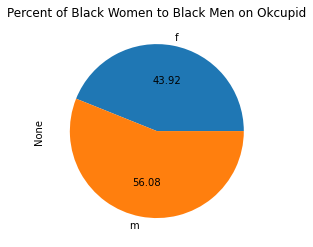

In [91]:
black_df.groupby('sex').size().plot(kind='pie', autopct='%.2f', title = "Percent of Black Women to Black Men on Okcupid")

This shows us that there are more Black men on the app than there are Black women. Almost about **13%** more. 

# <font color='blue'>Let's see what some Black Women have to say about themselves for Essay0: About Me / Self summary</font>

In [92]:
with pd.option_context('display.max_colwidth', -1):
    display(black_f[["age","orientation","essay0"]].head(3))

,age,orientation,essay0
245,45,straight,"update: i'm ready for l o v e !! i just need someone that is committed to the process of getting to know each other. i'm definitely open to ages and races but sex -- men only please :) people seem to want to just rush into things and pow have everything be like a fireworks display and then i think they tend to fizzle out just as fast. so...i'm just open to friendship right now... previous: i guess i'm just not in the mood of talking myself up and would rather just get to know someone and listen to them talk about themselves and let them get to know me in a way that has a more natural flow ;-) this doesn't mean i can't hold a conversation it just means that sometimes i wish i could wave a magic wand and have my soulmate here beside me. i'm saying this somewhat facetiously because i really don't think i believe in the idea of a soulmate. even if i was with a person for 30 years and they (god forbid) passed away, i would still want to believe that there was another love out there for me. yes, that is thinking a bit too far in the future but i'm working on trying to live more in the moment lol. i would like to meet someone that is open-minded without being super liberal and crazy. the current definition of open-minded is sort of a free-for-all and i don't view it that way. i would say i'm more of a moderately conservative person in some ways but i definitely have my wild and spontaneous side. i'm a bay area native currently living in the east bay but originally from the city. i'm in the technical field (who isn't!) but am currently considering a return to school for a masters degree and a career change. i have two teenage sons and i love them dearly but once they're grown and gone it's gonna be all about me! lol they don't need a dad but someone that is teen-friendly would be a welcome addition to my life. anyway back to the soulmate thing. sometimes you just meet someone and everything is so easy and just falls into place effortlessly. the problem with that is sometimes it's so easy you forget to view the red flags and warning signs. i would like to meet someone and keep my eyes open but still have the pieces fit together like that. i'm not a person that really has favorites. there are a few categories of things (movies for example) where i do have some favorites but overall i might have a consuming interest in something one year and the next year i'll be on to something else. i definitely don't have a favorite song or color or day of the week or anything like that. this makes me more flexible to be open-minded as to my partner's interests but i have enough things that interest me and enough life-long friends that i won't try to lose myself in the other person's life but still have my own interests as well. i wouldn't want to be with someone that requires so much ""alone"" time though that we don't have enough time together. okay that was rambling but i hope i've said a little about myself at least to give you an idea of, if not who i am, then, who i would like to be with lol some interests: reading spoken word poetry (hearing) comedy shows live music hanging out with friends and family going to the movies surfing the 'net' travel i am awake, aware, and significant"
284,24,straight,"ok well i guess its time to spill my guts out to the world....and notify the people who read this how wonderful and down to earth i am. lol but thats boring, i live with myself everyday and come to realize that id rather ""you"" get to kno me without the persuasion of my perception i love bein a mommie to a lovely 3yr old.... thats #1 without a doubt"
306,33,straight,"hey guys! i really am 1sassyscorp! lolol! im looking some a male! tall and handsome is a must ! someone hard working! and educated! someone family oriented and ready to treat a lady right! ive heard every line in the book, so please come with conversation and nice pix! be real, and be ready! u only have one shot! i work very hard, im fun, outing a

# <font color='blue'>Now How About Black men?? Essay0: About Me / Self summary</font>

In [93]:
with pd.option_context('display.max_colwidth', -1):
    display(black_m[["age", "orientation","essay0"]].head(5))

,age,orientation,essay0
90,24,straight,mmmmmm idk what to say so just ask me :)
99,46,straight,"hello, i am outgoing, family oriented. i am a single father of a wonder 7 yr old. i enjoy car rides along the coast, long walks. i enjoy playing basketball and fishing."
256,21,straight,NaN
280,27,straight,NaN
440,24,straight,"about me, so i'm in my early twenties at this point trying to find my place and purpose in the world. coming from outside of boston, mass. will always be my home but i had to see what cali has to offer. i'm a very easy going, fun and a loving guy that treats others the way i would like to be treated. i manage a restaurant in the marina mostly during the week, on the weekends i'm always getting into something. i love going out but know how to keep it low key at home sometimes too. i stay pretty layed back and try not to let the small things in life get to me, anything else you wanna know just ask.."


# <font color='purple'>Hmmmmm interesting </font>

From just looking at what's above: here are somes quick assumptions that can be made: Men don't say a lot, women are more descriptive, and more women fill out essay sections then do men.

I'll be honest, being no stranger to dating apps: that's often what I feel and when I see the above my immediate thought is, is it true? On dating apps?/in this subset  of data? Maybe we can test the truthiness of this based on Essay0.

In [94]:
#the amount of womem who filled out this essay
black_f["essay0"].count()

770

In [95]:
#the amount who did not
black_f["essay0"].isnull().sum()

112

#### Let's visualize this:

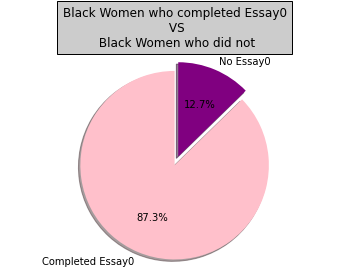

In [96]:
labels = 'Completed Essay0', 'No Essay0'
sizes = [black_f["essay0"].count(),black_f["essay0"].isnull().sum() ]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors =["pink", "purple"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Black Women who completed Essay0\n" +" VS\n" +" Black Women who did not", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

In [97]:
#the amount of men who filled out this essay
black_m["essay0"].count()

1004

In [98]:
#the amount of men who did not
black_m["essay0"].isnull().sum()

122

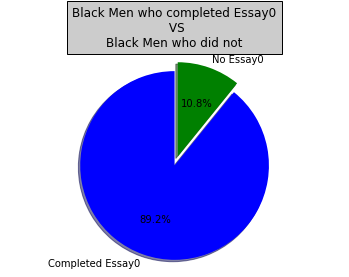

In [99]:
labels = 'Completed Essay0', 'No Essay0'
sizes = [black_m["essay0"].count(),black_m["essay0"].isnull().sum() ]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors =["blue", "green"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Black Men who completed Essay0\n" +" VS\n" +"Black Men who did not", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

From the two pie charts above we can see more clearly the ratio of Black Women who filled out this essay in justaposition to Black Men. 
Showing that, though not incredibly striking Black women filled out Essay0 at a smaller rate than Black men.
**12.7% of Black women did not filled out this section and 10.8% of Black men did not fill out this section**

But what does this tell us? Does it say much?? 
Im curious to know how desciptive/detailed Black Women and Black men were . In other words, who wrote more? 

Because, you'll have issues with NAN and empty columns, we are going to make sure we drop them:

In [153]:
count = 0
for text in black_f["essay0"].dropna():
    frame = text.split(" ")
    for i in frame:
        count +=1
    
    
print(count)

81648


In [154]:
print("Black Women Essay0 word mean =", (round(81648/770)))

Black Women Essay0 word mean = 106


In [155]:
count = 0
for text in black_m["essay0"].dropna():
    frame = text.split(" ")
    for i in frame:
        count +=1
    
    
print(count)

99137


In [156]:
print("Black Men Essay0 word mean =", (round(99137/1004)))

Black Men Essay0 word mean = 99


This shows us that though less Black Women filled out Essay0(The About Me/Summary Section) compared to Black men, on average they did said a bit more than men in essay0. 

### What are Black men and women actually saying in these essays???

We were able to skim a couple entries above. But I wonder what words pop up often when women and men talk about themselves. I'm curious to know what words stand out. And if both talk about themselves and their wants in similar ways. I'm going to use a wordcloud to visualize this and see if it gives us any information

Below is the code, I used to generate my word bubbles

**Black Women Essay 0**

In [104]:
# all_bf_essay0 = []
# for text in black_f["essay0"]:
#     all_bf_essay0.append(text)

In [105]:
# wordcloud_bf_essay0 = WordCloud(background_color ="white", stopwords= STOPWORDS).generate(str(all_bf_essay0))

# plt.figure(figsize = (8,8))
# plt.imshow(wordcloud_bf_essay0, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# saving it as an image
# wordcloud_bf_essay0.to_file("all_bf_essay0.png")

**Black Men Essay 0**

In [106]:
# all_bm_essay0 = []

# for text in black_m["essay0"]:
#     all_bm_essay0.append(text)

In [107]:
# wordcloud_bm_essay0 = WordCloud(background_color ="white", stopwords= STOPWORDS).generate(str(all_bm_essay0))

# plt.figure(figsize = (8,8))
# plt.imshow(wordcloud_bm_essay0, interpolation='bilinear')
# plt.axis("off")
# plt.show()
# #wordcloud_bm_essay0.to_file("all_bm_essay0.png")

**Black Women Word Cloud**
![alt](all_bf_essay0.png)


**Black Men Word Cloud**
![alt](all_bm_essay0.png)

You can see that in both worldclouds, words that pop our are: **love, life, people, friend, time, thing, looking, know**


# <font color = "blue"> How does age come into play???? </font>

Im curious to see what similarities and differences show up when age is factored in! Lets see. 
Here I am going to break up our already broken up by sex dataframe, by age. Right off the bat, I am interested in seeing the differences between those 30 and under vs those above 30. But let's go look at some of the stats on age. 

In [108]:
black_df["age"].describe()

count    2008.000000
mean       32.015936
std         9.693034
min        18.000000
25%        25.000000
50%        30.000000
75%        37.000000
max        69.000000
Name: age, dtype: float64

So the mean age is 32 and our median age is actually 30! So I think 30 is a go! Lets break up these dataframes

In [143]:
#Black women 30 and under
thirty_under_f = black_f[black_f["age"] <=30]
#black women over 30
over_thirty_f = black_f[black_f["age"] > 30]
#Black men 30 and under 
thirty_under_m = black_m[black_m["age"] <=30]
#Black men over 30
over_thirty_m = black_m[black_m["age"] > 30]

## For this analysis, we'll be diving into Essay 5--the "I value / Need/Can't live Without" Section

#### Black Women 30 and Under 

In [133]:
bf_30_under_essay5 = []
for text in thirty_under_f["essay5"].dropna():
    bf_30_under_essay5.append(text)

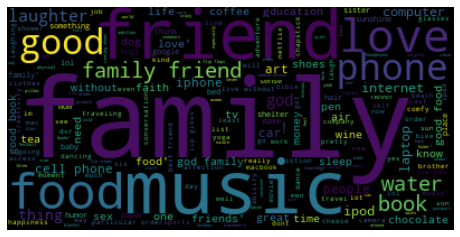

In [134]:
wordcloud_bf30under_essay5 = WordCloud(stopwords= STOPWORDS).generate(str(bf_30_under_essay5))

plt.figure(figsize = (8,8))
plt.imshow(wordcloud_bf30under_essay5,interpolation='bilinear')
plt.axis("off")
plt.show()

# saving it as an image
# wordcloud_bf_essay0.to_file("all_bf_essay0.png")

#### Black Women over 30

In [137]:
bf_over30_essay5 = []
for text in over_thirty_f["essay5"].dropna():
    bf_over30_essay5.append(text)

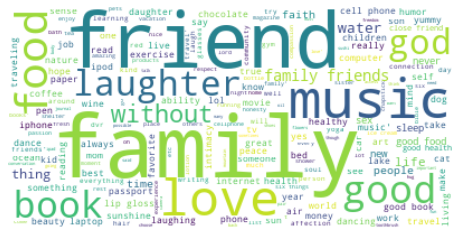

In [138]:
wordcloud_bfover30_essay5 = WordCloud(background_color = "white", stopwords= STOPWORDS).generate(str(bf_over30_essay5))

plt.figure(figsize = (8,8))
plt.imshow(wordcloud_bfover30_essay5,interpolation='bilinear')
plt.axis("off")
plt.show()

# saving it as an image
# wordcloud_bf_essay0.to_file("all_bf_essay0.png")

Some similarities noted with both Black women 30 and under and Black women over 30 are the mention of **friends, family, food, music, and love**  You can see these are things both groups value and need

Some differences that stuck out at me was that **laughter and god** showed up bigger for Black women over 30. And that technology like the **phone, internet, computer** were more visible in population 30 and under. 

#### Black Men 30 and Under

In [135]:
bm_30_under_essay5 = []
for text in thirty_under_m["essay5"].dropna():
    bm_30_under_essay5.append(text)

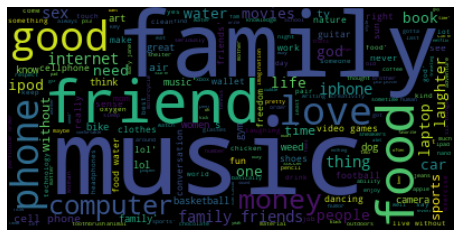

In [136]:
wordcloud_bm30under_essay5 = WordCloud(stopwords= STOPWORDS).generate(str(bm_30_under_essay5))

plt.figure(figsize = (8,8))
plt.imshow(wordcloud_bm30under_essay5, interpolation='bilinear')
plt.axis("off")
plt.show()

# saving it as an image
# wordcloud_bf_essay0.to_file("all_bf_essay0.png")

#### Black Men Over 30

In [144]:
bm_over30_essay5 = []
for text in over_thirty_m["essay5"].dropna():
    bm_over30_essay5.append(text)

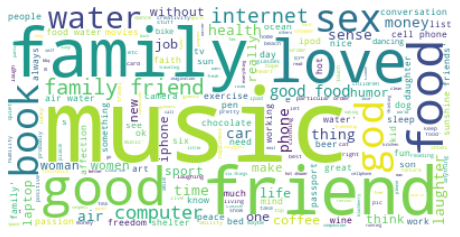

In [145]:
wordcloud_bmover30_essay5 = WordCloud(background_color = "white", stopwords= STOPWORDS).generate(str(bm_over30_essay5))

plt.figure(figsize = (8,8))
plt.imshow(wordcloud_bmover30_essay5,interpolation='bilinear')
plt.axis("off")
plt.show()

# saving it as an image
# wordcloud_bf_essay0.to_file("all_bf_essay0.png")

Some similarities noted between younger and older Black men is the mention of **family, friends, love, music and food.** This is also the same as what showed up for both froups of Black women. Something that stuck out to me as different between both groups of men were that **sex and god** showed up bigger for Black men over thirty, and that technology appeared much larger in the group 30 and under. And what was also present in the younger group was **money.**

# Conclusion and Further Study

- This datset can dismiss or support assumptions/assertions Black women on dating apps have about Black men and vice versa. Yet it definitely shows that both groups hold similarites.
- This dataset, though not containing too many actionable features in terms of business intelligence, I do believe it contains interesting data that could could be used in research on such topics such as human wants and desires.
- The heart of this dataset, truly lies in the inculsion of the essay questions. Simply from the essays you can come up with more questions or areas of exploration.
- This dataset can be of great use for natural language processing techniques and studies
- I would further like to: 
    - Explore more natural langauge processing tools
    - Diseggregate the data based on orientation
    - Implement text scatter plot and machine learning